<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe MergeSort**

## **1. Problema: Ordenamiento de una secuencia de números**
>Dado un arreglo $n$ de elementos ordenables, genere una permutación de la secuencia lógica, tal que los elementos del arreglo queden ordenados de menor a mayor.

**Entrada**: Secuencia de $n$ números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia, tal que $a_1'\leq a_2' \leq... \leq a_n'$.

## **2. MergeSort**

### **2.1. Descripción del algoritmo**
El MergeSort es un algoritmo de ordenamiento recursivo el cual usa el paradigma de diseño "Divide y vencerás". Parte de dos ideas, primero que es más fácil resolver un problema grande dividiéndolo en subproblemas pequeños, y segundo que es menos complejo combinar (ordenadamente en una sola lista) dos arreglos ordenados que dos desordenados. 

Dicho esto, el algoritmo esta compuesto por dos funciones, la función recursiva MergeSort, que se encarga de separar un arreglo por la mitad para obtener dos subarreglos, repitiendo este paso con cada mitad haste generar arreglos de un elemento, y la función Merge que combina dos listas ordenadas en una sola ordenada. Es decir, el algoritmo descompone un arreglo hasta obtener los elementos y merge une esos elementos de forma ordenada, para obtener la secuencia de menor a mayor.

### **2.2. Implementación del algoritmo**

In [1]:
import random
from termcolor import colored
import copy

In [2]:
#Función Merge
def Merge(L, R, c, verbose):
  A = []
  if(verbose): print("Comparaciones:")
  while(True):

    if(len(L) == 0):
      while(len(R)>0):
        if(verbose):
          if(len(R) == 1):
            print("L = ", colored(f"[ø] ", "red"), "R = ", colored(f"{str(R[0:1])}","red") )
          else:
            print("L = ", colored(f"[ø] ", "red"), "R = ", colored(f"{str(R[0:1])}","red"), str(R[1:]) )
        c += 1
        A.append(R.pop(0))
      return A, c
    
    if(len(R) == 0):
      while(len(L)>0):
        if(verbose):
          if(len(L) == 1):
            print("L = ", colored(f"{str(L[0:1])}","red"), " R = ", colored(f"[ø]", "red"))
          else:
            print("L = ", colored(f"{str(L[0:1])}","red"), str(L[1:]), " R = ", colored(f"[ø]", "red"))
        c += 1
        A.append(L.pop(0))
      return A, c

    if(verbose):
      if(len(L) == 1):
        print("L = ", colored(f"{str(L[0:1])}","red"), end="  ")
      else:
        print("L = ", colored(f"{str(L[0:1])}","red"), str(L[1:]), end="  ")
      if(len(R) == 1):
        print("R = ", colored(f"{str(R[0:1])}","red") )
      else:
        print("R = ", colored(f"{str(R[0:1])}","red"), str(R[1:]) )

    if (L[0] <= R[0]):
      c += 1
      A.append(L.pop(0))
    else:
      c += 1
      A.append(R.pop(0))

  return A, c



In [3]:
#Función MergeSort
def MergeSort(A, c = 0, r = 0, verbose = False):
  if (len(A) <= 1): return A, c, r
  r += 1;
  mitad = int(len(A)/2)

  if (verbose):
    print("Llamado a MergeSort con arreglo:")
    print(A)
    print("L = ", colored(f"{str(A[:mitad])}","green"), end=" ")
    print("R = ", colored(f"{str(A[mitad:])}","blue"))

  izq, c, r = MergeSort(A[:mitad], c, r, verbose)
  der, c, r = MergeSort(A[mitad:], c, r, verbose)
  
  A, c = Merge(izq, der, c, verbose)
  if (verbose):
    print("Resultado:")
    print(A, "\n")

  return A , c, r



In [4]:
A = [4, 1, 3, 0, 2]
A, c, r = MergeSort(A)
print(A)
print("Número de comparaciones: " + str(c))
print("Número de recursiones: " + str(r))


[0, 1, 2, 3, 4]
Número de comparaciones: 12
Número de recursiones: 4


### **2.3. Ejemplo**
Considerando el arreglo:

$A=[4,1,3,0,2]$ 

1.- En el primer llamado a MergeSort:

Subdividirá el arreglo original en 2:

$L_A=[4,1]$ y $R_A=[3,0,2]$ 

2.- Como el largo de $L_A=[4,1]$ es distinto de 1, entonces se llamará a MergeSort

Subdividirá el arreglo en 2:

$L_{L1}=[4]$ y $R_{L1}=[1]$ 

3.- Y al ser de largo 1 se combinan de menor a mayor:

$B=[1,4]$

4.- Como el largo de $R_A=[3,0,2]$ es distinto de 1, entonces se llamará a MergeSort

Subdividirá el arreglo en 2:

$L_{R1}=[3]$ y $R_{R1}=[0,2]$

5.- Como el largo de $R_{R1}=[0,2]$ es distinto de 1, entonces se llamará a MergeSort

Subdividirá el arreglo en 2:

$L_{R2}=[0]$ y $R_{R2}=[2]$

6.- Y al ser de largo 1 se combinan de menor a mayor:

$B'=[0,2]$

7.- nuevamente se combinan con $L_{R1}=[3]$ comparando los menores elementos:

$B'' = [0,2,3]$

8.- Y para finalizar se combinan $B = [1,4]$ y $B'' = [0,2,3]$ agregando los elementos de menor a mayor:

**Resultado =** $[0,1,2,3,4]$

Y ya conseguimos el arreglo ordenado.

#### **Imagen del ejemplo**

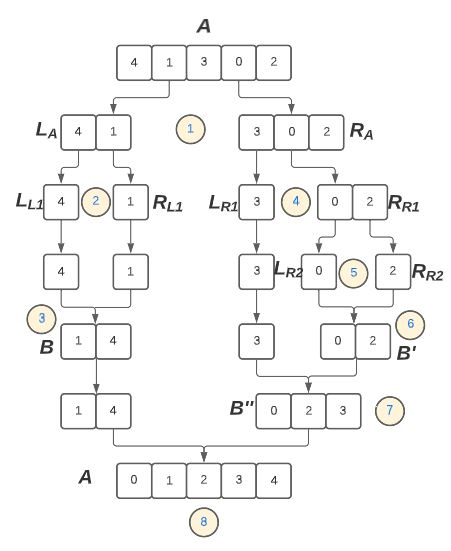

### **2.4. Ejecución paso a paso (Verbose = True)**

In [5]:
A = [6,5,3,1,8,7,2,4]
A, c, r = MergeSort(A,0,0,True)
print("Arreglo ordenado")
print("Número de comparaciones: " + str(c))
print("Número de recursiones: " + str(r))

Llamado a MergeSort con arreglo:
[6, 5, 3, 1, 8, 7, 2, 4]
L =  [6, 5, 3, 1] R =  [8, 7, 2, 4]
Llamado a MergeSort con arreglo:
[6, 5, 3, 1]
L =  [6, 5] R =  [3, 1]
Llamado a MergeSort con arreglo:
[6, 5]
L =  [6] R =  [5]
Comparaciones:
L =  [6]  R =  [5]
L =  [6]  R =  [ø]
Resultado:
[5, 6] 

Llamado a MergeSort con arreglo:
[3, 1]
L =  [3] R =  [1]
Comparaciones:
L =  [3]  R =  [1]
L =  [3]  R =  [ø]
Resultado:
[1, 3] 

Comparaciones:
L =  [5] [6]  R =  [1] [3]
L =  [5] [6]  R =  [3]
L =  [5] [6]  R =  [ø]
L =  [6]  R =  [ø]
Resultado:
[1, 3, 5, 6] 

Llamado a MergeSort con arreglo:
[8, 7, 2, 4]
L =  [8, 7] R =  [2, 4]
Llamado a MergeSort con arreglo:
[8, 7]
L =  [8] R =  [7]
Comparaciones:
L =  [8]  R =  [7]
L =  [8]  R =  [ø]
Resultado:
[7, 8] 

Llamado a MergeSort con arreglo:
[2, 4]
L =  [2] R =  [4]
Comparaciones:
L =  [2]  R =  [4]
L =  [ø]  R =  [4]
Resultado:
[2, 4] 

Comparaciones:
L =  [7] [8]  R =  [2] [4]
L =  [7] [8]  R =  [4]
L =  [7] [8]  R =  [ø]
L =  [8]  R =  [ø]
Re



*   Color verde: Denotará el sub-arreglo izquierdo.
*   Color azul: Denotará el sub-arreglo derecho.
*   Color rojo: Denotarán comparaciones entre los elementos.



#### **Ejemplo dinámico**

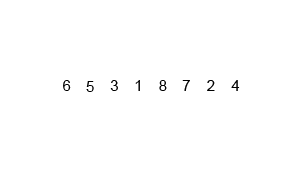

El algoritmo implementado, a diferencia de la imagen, comienza a ramificar y combinar de **izquierda a derecha**, es decir, primero divide el arreglo en una parte izquierda y derecha, luego subdivide la **izquierda**, hasta que quedan 2 elementos a combinar. Solo cuando ya se haya realizado una combinación, el algoritmo volverá por el árbol para continuar, ya sea dividiendo y/o combinando la ramificación contigua.

## **3. Tiempo de ejecución**




#### **Teorema (Tiempo de ejecución)**.
*El algoritmno **MergeSort** tiene un tiempo de ejecución $O(nlog(n))$ en el peor caso.*

### **Prueba del Teorema usando árbol de recurrencia**
Para realizar el árbol de recurrencia debemos primeramente modelar el comportamiento del árbol con su función recursiva, esto se realiza con tres pasos.
#### **Divide:**
La complejidad temporal del algoritmo cuando divide el arreglo en dos hasta llegar a un elemento es constatnte, de $Θ(1)$.
#### **Conquista:**
La complejidad del problema original $T(n)$, recursivamente se divide en 2 subproblemas de tamaño $n/2$, es decir, $2T(n/2)$.
#### **Combina:**
Finalmente la función Merge recombina los subproblemas, con una complejidad igual al número de elementos $n$, complejidad de $Θ(n)$.

**Obtenemos:** 

$T(n) = \begin{cases} Θ(1) & \text{Si } n = 1 \\ 2T(n/2) + Θ(n) & \text{Si } n > 1 \end{cases}$

**Reescribiendo:**

$T(n) = \begin{cases} c & \text{Si } n = 1 \\ 2T(n/2) + cn & \text{Si } n > 1 \end{cases}$

Entonces, según la función, el problema comienza siendo $T(n)$ y para la segunda recursión se deja atras una complejidad de $cn$, realizamos otra recursión sobre los $2T(n/2)$ como ramificaciones de un árbol, por cada uno de los subproblemas se deja atras una complejidad de $cn/2$, que en total suman $cn$ ($cn/2 + cn/2 = cn$), y otros dos pares de $T(n/4)$. Se realizan recursiones hasta que n sea igual a 1, lo que ocurrirá en $log_2(n)$ recursiones y por cada una se dejó atras una complejidad de $cn$, más el primer $cn$ el algoritmo tiene un costo total de $cn(log_2(n)) +cn$, complejidad de $Θ(n(log(n))$. *Se puede observar que la complejidad es igual sin importar el orden de los elementos.*

### **Ejemplo**
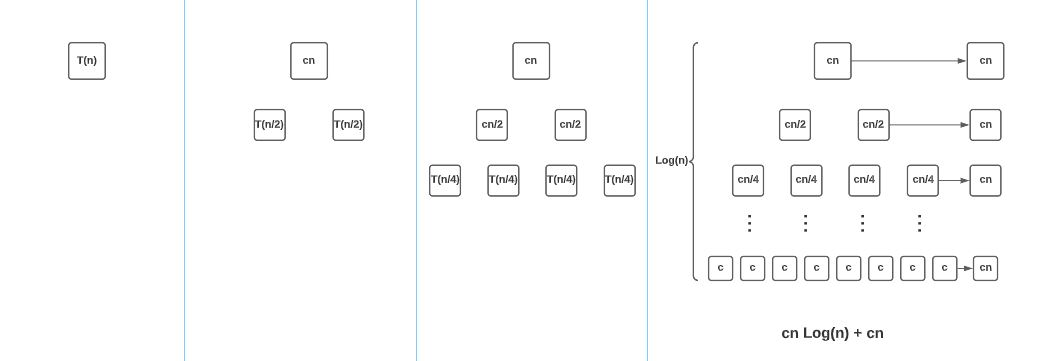

In [6]:
A = [1,2,3,4]
A, c, r = MergeSort(A)
print("Número de comparaciones: " + str(c))
print("Número de recursiones: " + str(r))
A = [4,3,2,1]
A, c, r = MergeSort(A)
print("\nNúmero de comparaciones: " + str(c))
print("Número de recursiones: " + str(r))
print("\nNo es relevante el orden de los elementos en la cantidad de comparaciones")

Número de comparaciones: 8
Número de recursiones: 3

Número de comparaciones: 8
Número de recursiones: 3

No es relevante el orden de los elementos en la cantidad de comparaciones


## **4. Correctitud**

### **4.1. Teorema 1 (Correctitud de la función Merge)**

*El algoritmo **Merge** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

#### **Propiedad invariante de bucle**
>Al comienzo de cada iteración $i$, el arreglo a retornar $A[...]$, tendrá a los $i-1$ elementos ordenados más pequeños del **sub-arreglo** ordenado izquierdo $L[...]$ y **sub-arreglo** ordenado derecho $R[...]$, los cuales serán los arreglos de entrada.

#### **Inicialización**
Al comenzar la iteración $i = 1$, el arreglo $A$ se encontrará vacío cumpliéndose la propuesta de que este contendrá a $i-1 = 0$ elementos ordenados más pequeños de ambos **sub-arreglos** dados. Al finalizar con la primera comparación, entre el más pequeño elemento de $L[...]$ y $R[...]$, en $A$ se añadirá al **menor de todos**, para cumplir que a la próxima iteración $i+1$, habrán $largo(A) + 1$ elementos más pequeños en $A[...]$.

#### **Mantención**
En la **$i$-ésima** iteración $i$, habrán $i-1 = n$ elementos más pequeños en $A[...]$ provenientes de los menores números de ambos **sub-arreglos** ordenados. Asumiendo que los actuales $n$ elementos se encuentran ordenados por comparación de los menores de $L$ y $R$, se justifica la correctitud del algoritmo al finalizar la iteración, agregando entre los elementos **restantes** de los **sub-arreglos**, al menor nuevamente, aumentando en uno los elementos ordenados de $A[...]$ ($n$) conforme aumentan las iteraciones ($i$).

### **4.2. Teorema 2 (Correctitud de la función MergeSort)**

*El algoritmo **MergeSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

#### **Por inducción matemática**
>Probar $P(n)$ para un caso base.
>
>Probar que si $P(n)$ es cierto, entonces $P(n+1)$ también lo es.

Para el caso base $P(1)$, MergeSort retornará el arreglo de largo $n = 1$, el cual se encontrará ordenado por ser un solo elemento.
Para un problema $P(n)$, lo que ocurrirá es que en un posterior llamado a MergeSort este resolverá problemas $P(n/2)$, posteriormente $P(n/4)$ y así sucesivamente hasta tener muchos problemas en el caso base $P(1)$, donde se cumple que los subarreglos de $n=1$ están ordenados. Si el problema es $P(k)$ con $k < n$, ocurrirá que se dividirá $k$ en 2 como ocurrió con $n$ hasta llegar nuevamente a $P(1)$.

Como se detalló anteriormente se cumple que el algoritmo es correcto para $P(n)$ y todo $P(k)$ con $k < n$. Lo que ocurrirá con un $P(n+1)$ es que, en el próximo llamado recursivo de MergeSort, generará problemas $P((n+1)/2)$. Donde se observará que $\frac{n+1}{2} < n$ , entonces se comprueba que para $P(n+1)$ en próximos llamados a MergeSort ocurrirá igual que con $P(n)$, entregando subarreglos ordenados de un elemento y combinándolos con la función Merge para obtener como resultado un **arreglo ordenado**.

## **5. Experimentos**

### **5.1. Número de comparaciones experimentales para el mejor y peor caso**


Se utilizaron los mismos arreglos experimentales del mejor y peor caso que en el algoritmo InsertionSort para observar el comportamiento del MergeSort.

Las secuencias de entrada son:
*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.
*   Caso teórico: Secuencia para calcular aproximadamente las operaciones del algoritmo, esta se rige por la fórmula $n*log2(n)$.

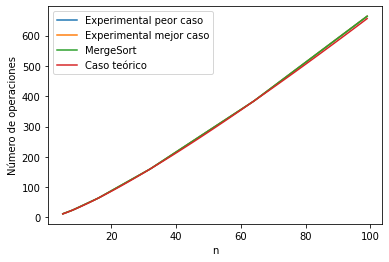

In [9]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,100)]
y_teo = [n * math.log2(n) for n in range(5,100)] #usando la fórmula descrita en la sección de tiempo de ejecución
y_worst = []
y_best = []
y_Merge = []

for n in range(5,100):
  var_void,c, r= MergeSort(list(range(0, n))) #rango de menor a mayor con n elementos
  y_best.append(c)

  var_void,c, r= MergeSort(list(range(n-1, -1, -1))) #rango de mayor a menor con n elementos
  y_worst.append(c)

  a = random.sample(range(1, 100), n) # n elementos con valores aleatorios
  a,counter, r = MergeSort(a)
  y_Merge.append(counter)


plt.plot(x,y_worst)
plt.plot(x,y_best)
plt.plot(x,y_Merge)
plt.plot(x,y_teo)
plt.legend(["Experimental peor caso", "Experimental mejor caso", "MergeSort", "Caso teórico"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()

#### **Análisis de resultados**
Como se observó en la sección 3 "Tiempo de ejecución", en la fórmula para calcular el números de comparaciones del algoritmo solo depende el largo $n$ del arreglo. No existe un caso particular de permutación de un mismo arreglo $A[...]$ tal que las comparaciones del algoritmo sean distintas entre sí, es decir, para una permutación del arreglo $A'[...]$ y para otra permutación del mismo arreglo $A''[...]$, la cantidad de comparaciones que realiza el algoritmo para ordenar al primero es la misma cantidad de comparaciones para ordenar el segundo.

Los argumentos anteriores explican los resultados obtenidos en el experimento, donde en un arreglo de menor a mayor, en otro de mayor a menor y un tercero totalmente aleatorio, con la misma cantidad de elementos, se observa que en los tres el número de comparaciones es la misma, lo que implica que no existe un mejor o peor caso, solo depende del largo del arreglo $n$.

### **5.2. Comparar MergeSort con InsertionSort**

#### **Implementación del InsertionSort**

In [ ]:
import random
from termcolor import colored
import copy

def insertion_sort(a, verbose = False):
    n = len(a)
    T = 0 #contador de comparaciones
    if verbose:
      print("Antes de comenzar")
      print(colored(f"{str(a[:1])[1:-1]}", "green"), ",", str(a[1:])[1:-1])

    for i in range(1,n): #Comienzo de cada iteración de i, bucle mayor
      key = a[i]
      if verbose:
        print("\nIteración",i)
        if i == n-1:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), end= '')
        else:
          print(str(a[:i])[1:-1], ",", colored(f"{str(a[i:i+1])[1:-1]}", "red"), ",", str(a[i+1:])[1:-1], end= '')
        print("   key:", colored(f"{key}", "red"))
        print("Comparaciones")

      for k in range(i-1,-1,-1):#Inicio de las comparaciones
        T += 1
        if a[k] < key: #Si es verdad
          a[k+1] = key    #key toma el lugar que le corresponde, a la derecha del elemento actual
          if verbose:
            print(str(a[:k+1])[1:-1], ",", colored(f"{str(a[k+1:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", colored(f"{key}", "blue"))

          break           #En este caso se rompe este ciclo para ubicar otro key

        a[k+1] = a[k]  #Si es falso, el elemento de la mano ordenada se "mueve a la derecha"(se copia)
        if verbose:
          if k == 0:
            print(colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)
          else:
            print(str(a[:k])[1:-1], ",", colored(f"{str(a[k:k+2])[1:-1]}", "blue"), ",", str(a[k+2:])[1:-1], "   key:", key)

      if key < a[0]:   
        T += 1         #Si se movieron a la derecha todos los elementos porque key era el más pequeño
        a[0] = key     #Entonces se concluye este ciclo colocándo a la key en la primer posición

        if verbose:
            print(colored(f"{str(a[0:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1], "   key:", colored(f"{key}", "blue"))
      if verbose:
        print("Al finalizar iteración")
        if i != n-1:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"), ",", str(a[i+1:])[1:-1])
        else:
            print(colored(f"{str(a[:i+1])[1:-1]}", "green"))

    if verbose:
      print("\nArreglo ordenado!")
      print(str(a[:]))
    return a, T

#### **Tiempo de ejecución**

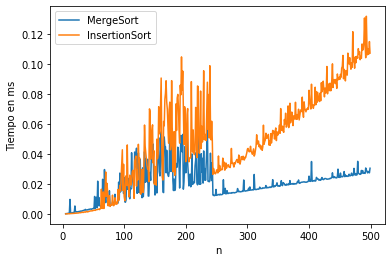

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_Merge = []
y_insertion = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  #la función repeat está ejecutando 20 veces merge_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t_merge = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo b y retorna el mejor tiempo obtenido.
  t_insertion = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({b})", repeat=1, number=10)

  x.append(n)
  y_Merge.append(t_merge)
  y_insertion.append(t_insertion)


plt.plot(x,y_Merge)
plt.plot(x,y_insertion)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

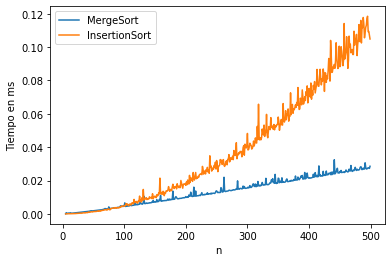

In [ ]:

x=[]
y_Merge = []
y_insertion = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  #la función repeat está ejecutando 20 veces merge_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t_merge = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces insertion_sort con el arreglo b y retorna el mejor tiempo obtenido.
  t_insertion = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({b})", repeat=1, number=10)

  x.append(n)
  y_Merge.append(t_merge)
  y_insertion.append(t_insertion)


plt.plot(x,y_Merge)
plt.plot(x,y_insertion)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de resultados**
En el tiempo de ejecución de ambos algoritmos se observan dos detalles significativos.

1.  El primero es que, en complejidad temporal, es más eficiente en tiempo el MergeSort para arreglos con gran cantidad de datos siguiendo una cota asintótica de $O(n(log(n))$, ya que InsertionSort sigue una cota $O(n^2)$ que crece con mayor rapidez representadas perfectamente con el tiempo de ejecución del segundo gráfico.
2.  Lo segundo es que se pueden notar unos *peaks* en el grágico uno, que se deben a los procedimientos externos realizados por el entorno de ejecución, comprobados con una prueba de **"ejecución de todas las celdas de código del colab"**, donde el primer gráfico se ejecutó con **Ejecutar todas Ctrl+F9** justo después de recargar página y el segundo de forma individual.



#### **Comparaciones**

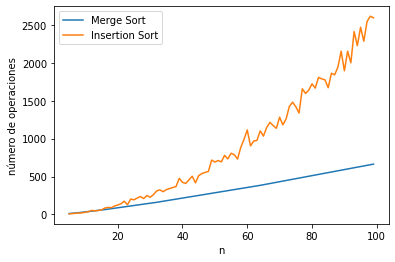

In [ ]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)] 
yM=[];
yI=[];

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  b = deepcopy(a)

  a,counterM, r = MergeSort(a)
  yM.append(counterM)

  b, counterI = insertion_sort(b)
  yI.append(counterI);

plt.plot(x,yM)
plt.plot(x,yI)
plt.legend(["Merge Sort", "Insertion Sort",])

plt.xlabel('n')
plt.ylabel('número de operaciones')
plt.show()

#### **Análisis de resultados**
En el gráfico se comparan el número de operaciones entre el algoritmo InsertionSort y el MergeSort. Se puede notar, al igual que en el experimento del tiempo de ejecución, que el InsertioSort tiene una cota asintótica $O(n^2)$ mientras que el MergeSort tiene cota de $O(n(log(n)))$. También se observa claramente que las comparaciones para el algoritmo MergeSort están regidas por una función **continua diferenciable**, por la suavidad de la curva, contrariamente InsertionSort construye una curva **no diferenciable** por la gran variación de operaciones por cada arreglo, dependiendo de lo ordenado que este se encuentre.
